This notebook is a first try to unroll the swiss role in the merscope experiment



In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsCreate_ImageContainer
import math
from tqdm.notebook import tqdm 

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = "./figures/distance_to_epithelial_cells/"
sc.set_figure_params(dpi=80, dpi_save=300, frameon=True, vector_friendly=True, figsize=[8,5])

In [2]:
# Set the version of baysor that we want to use
v = 30
path = f"baysor_{str(v)}_mol_per_cell/"

In [3]:
adata = ad.read_h5ad(path+"anndata.h5ad")

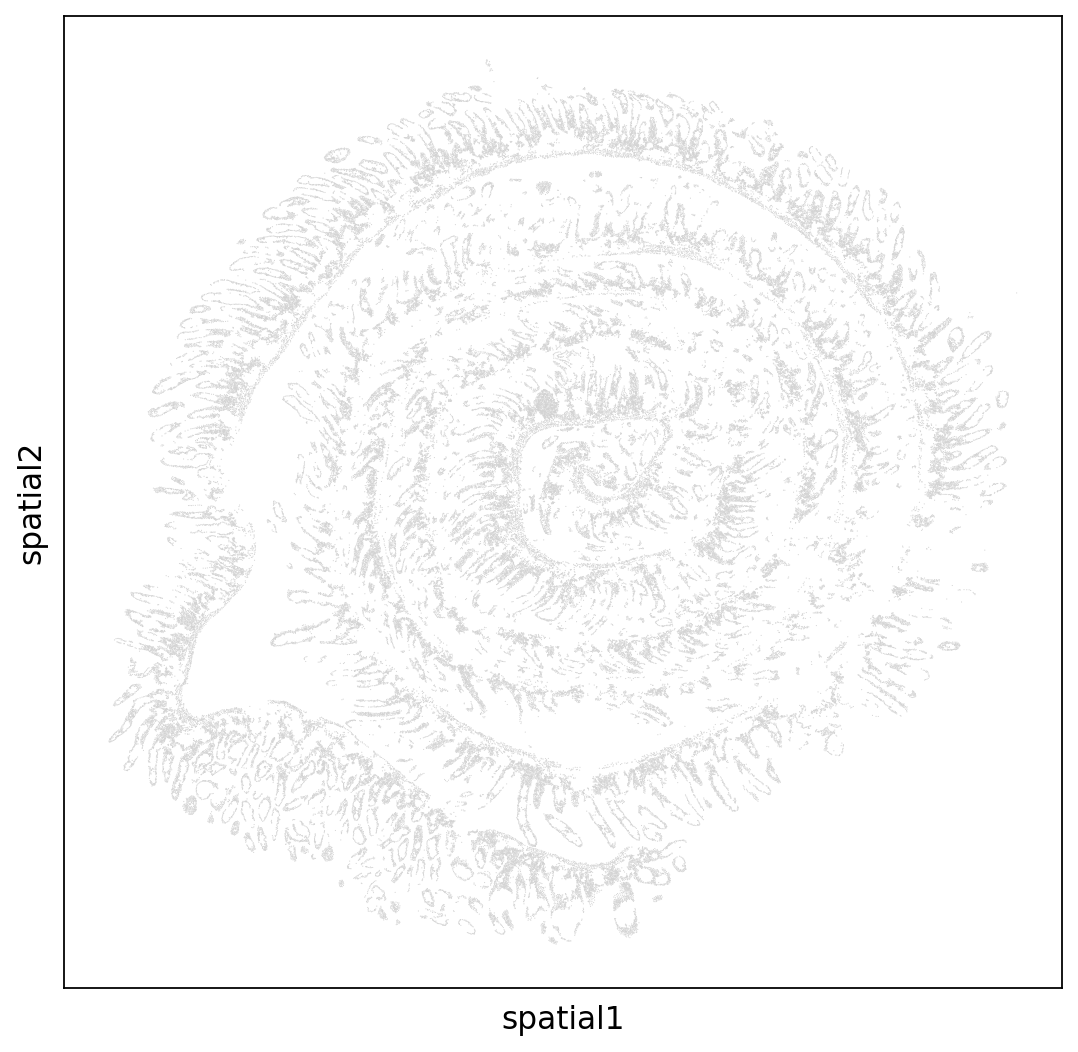

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sc.pl.embedding(adata, basis="spatial", ax=ax, show=False)

plt.show()

In [5]:
# To get the coordinates I used an interactive plot version.
# %matplotlib widget
# from mpl_point_clicker import clicker
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# ax.scatter(
#     adata.obsm['spatial'][:,0],
#     adata.obsm['spatial'][:,1],
#     color='black',
#     s=.1
# )
# klicker = clicker(ax, ["event"], markers=["x"])
# plt.show()
# # once done, get the positions with:
# klicker.get_positions()

In [6]:
# klicker.get_positions()

In [7]:
from scipy.interpolate import interp1d

# Function to get points, these are then used to calculate a spline
# used interactive plot to get the points
def getPoints():
    points = np.array(
       [[3877.01489361,  912.99449033],
        [3698.65977311,  816.00683744],
        [3536.12761867,  851.33416108],
        [3355.53633596,  733.57641561],
        [3174.94505325,  721.80064107],
        [2855.90045379,  839.55838653],
        [2633.17120511,  980.8676811 ],
        [2434.52079413,  957.316132  ],
        [2205.77183603, 1186.94373567],
        [1820.51043291, 1546.10485935],
        [1555.64321826, 1787.50823756],
        [1212.51978111, 1922.92964485],
        [ 869.39634396, 1911.1538703 ],
        [ 598.50941989, 1834.61133575],
        [ 532.29261623, 1946.48119394],
        [ 604.52912931, 2270.31499398],
        [ 718.90360837, 2535.26992129],
        [1013.86937013, 2923.87048133],
        [ 971.73140416, 3336.02259047],
        [ 827.25837799, 3683.40793961],
        [1037.94820782, 4254.53300513],
        [1411.17019209, 4866.87328157],
        [1760.31333867, 5337.90426344],
        [2115.47619467, 5632.29862712],
        [2675.30917108, 5914.91721624],
        [3259.22098518, 6026.78707444],
        [3758.85686735, 5926.69299079],
        [4144.11827047, 5767.72003441],
        [4529.37967359, 5508.65299437],
        [4860.46369189, 5231.92229252],
        [5161.44916308, 4819.77018338],
        [5384.17841175, 4319.29976514],
        [5444.37550599, 3842.38089599],
        [5323.98131752, 3041.6282268 ],
        [5131.35061596, 2576.4851322 ],
        [4746.08921284, 2199.6603467 ],
        [4324.70955318, 1917.04175757],
        [4029.74379142, 1746.29302664],
        [3457.87139616, 1493.11387389],
        [3018.43260823, 1493.11387389],
        [2440.54050355, 1775.73246301],
        [1862.64839887, 2311.5302049 ],
        [1603.80089365, 2864.9916086 ],
        [1537.58408999, 3318.35892865],
        [1633.89944077, 3877.70821963],
        [1766.33304809, 4425.28173606],
        [2133.53532294, 4872.76116884],
        [2711.42742762, 5120.05243433],
        [2904.05812918, 5196.59496888],
        [3524.08819982, 5267.24961616],
        [4168.19710816, 5108.27665978],
        [4619.67531494, 4731.45187428],
        [4872.50311074, 4160.32680876],
        [4926.68049555, 3512.65920868],
        [4752.10892226, 3006.30090316],
        [4505.30083589, 2564.70935765],
        [4180.23652701, 2205.54823397],
        [3752.83715792, 2076.01471396],
        [3325.43778884, 2081.90260123],
        [2771.62452186, 2117.22992487],
        [2350.2448622 , 2340.96964126],
        [2019.16084389, 2735.45808858],
        [1880.70752714, 3206.48907046],
        [1910.80607426, 3830.60512144],
        [2121.49590409, 4372.2907506 ],
        [2548.89527318, 4784.44285974],
        [2964.25522342, 4908.08849248],
        [3506.02907155, 4972.85525249],
        [3837.11308986, 4860.9853943 ],
        [4276.55187779, 4601.91835426],
        [4511.32054531, 4336.96342696],
        [4571.51763955, 4189.76624512],
        [4661.81328091, 3960.13864146],
        [4667.83299033, 3748.17469961],
        [4577.53734898, 3300.69526683],
        [4390.92635684, 2917.98259406],
        [4210.33507413, 2711.90653949],
        [3951.48756891, 2541.15780856],
        [3548.16703752, 2435.17583764],
        [3120.76766843, 2423.40006309],
        [2705.4077182 , 2505.83048492],
        [2482.67846952, 2611.81245584],
        [2265.96893026, 3029.85245226],
        [2193.73241718, 3547.98653232],
        [2271.98863969, 4060.23272511],
        [2536.85585433, 4325.18765241],
        [2922.11725745, 4525.37581971],
        [3391.6545925 , 4654.90933972],
        [3843.13279928, 4513.60004516],
        [4174.21681759, 4213.31779422],
        [4162.17739874, 3930.69920509],
        [4120.03943277, 3542.09864504],
        [4065.86204796, 3265.36794319],
        [3981.58611603, 3182.93752136],
        [3698.65977311, 3059.29188862],
        [3373.59546423, 2976.86146679],
        [3048.53115535, 3000.41301589],
        [2855.90045379, 3141.72231045],
        [2795.70335955, 3642.19272869],
        [2910.0778386 , 3918.92343054],
        [3337.47720769, 3989.57807783],
        [3602.34442233, 4019.01751419],
        [3740.79773908, 3924.81131782],
        [3632.44296945, 3701.07160143],
        [3481.95023386, 3506.7713214 ],
        [3331.45749826, 3471.44399776],
        [3217.08301921, 3600.97751778],
        [3270.4645621 , 3602.28753654],
        [3298.13278465, 3538.92419276],
        [3357.42183298, 3528.91945427]]

    )
    return points

# adapted from https://stackoverflow.com/questions/52014197/how-to-interpolate-a-2d-curve-in-python
# interploates a spline from the individual points.
# n = number of points to return
# method = one of ['slinear', 'quadratic', 'cubic']
def getSpline(n=250, method='cubic'):
    points = getPoints()
    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)/distance[-1]
    alpha = np.linspace(0, 1, n)
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points = interpolator(alpha)
    return interpolated_points

    



In [8]:
def getCenter(adata):
    x = np.min(adata.obsm['spatial'][:,0]) + (np.max(adata.obsm['spatial'][:,0]) - np.min(adata.obsm['spatial'][:,0]))/2
    y = np.min(adata.obsm['spatial'][:,1]) + (np.max(adata.obsm['spatial'][:,1]) - np.min(adata.obsm['spatial'][:,1]))/2
    return np.array([x,y])

In [9]:
def orderSpline(spline, center):
    """
    Order the spline so that it goes from the inside to the outside
    """
    dist_start = np.linalg.norm(spline[0]-center)
    dist_end = np.linalg.norm(spline[-1]-center)

    if dist_start < dist_end:
        return spline
    else:
        return np.flip(spline, axis=0)

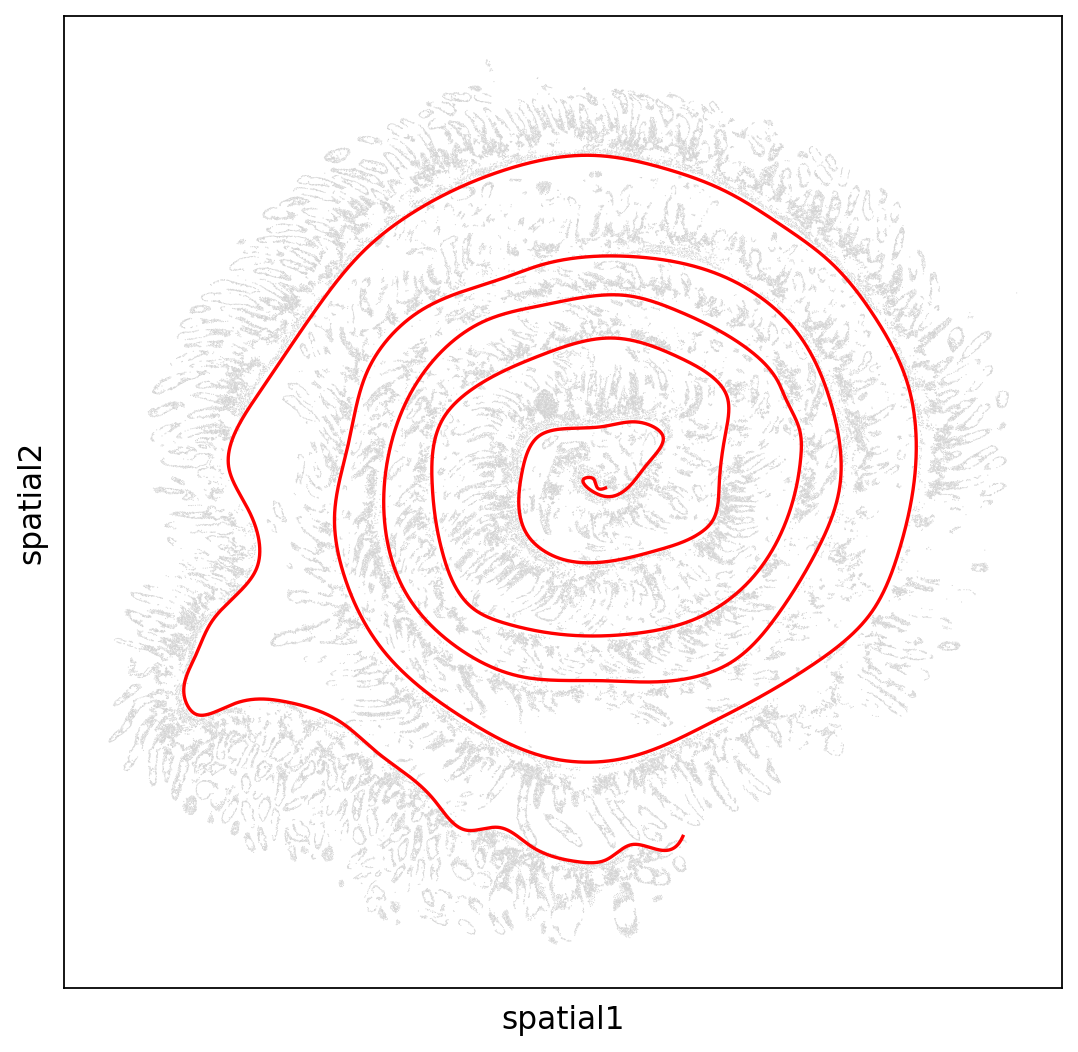

In [10]:
spline = getSpline(n=20000)
spline = orderSpline(spline, getCenter(adata))

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sc.pl.embedding(adata, basis="spatial", ax=ax, show=False)
ax.plot(*spline.T, color='red')


plt.show()


In [11]:
dists_from_end = np.linalg.norm(spline-spline[0], axis=1)


def unRoll(point, spline, dists_from_end):
    """
    calculates new x and y positions for a point

    three steps:
        1) remove all spline-points that where the angle between the spline-point to center and point to center is bigger than X
        2) distance from point to center has to be bigger than distance from spline to center
        3) get the minimun distance from point to spline after filtering (above criteria)
    
    """
    
    # Get the angles between
    # - point to center
    # - all spline edges to center
    # create mask with angles smaller than 10 degrees
    def unit_vector(vector):
        """ Returns the unit vector of the vector.  """
        return vector / np.linalg.norm(vector)

    def angle_between(point, spline):
        """ Returns the angle in radians between vectors 'v1' and 'v2'
        """
        v1_u = unit_vector(point)
        v2_u = (spline.T / np.linalg.norm(spline, axis=1)).T
        return np.arccos(np.clip(np.dot([v1_u], v2_u.T)[0], -1.0, 1.0))
    
    angles = angle_between(
        point-spline[0],
        spline-spline[0]
    )
    angles = np.array(angles)
    # the first value is always nan (spline[0]-spline[0]), to keep that value, we set it to zero
    angles[0] = 0

    keep_angle = angles < 10/180 * math.pi

    # compare distance of point to center to all spline edges to center
    # create mask where point to center is bigger
    dist_point = np.linalg.norm(point-spline[0])
    keep_dist = dists_from_end<dist_point

    # combine both masks
    keep = keep_angle & keep_dist

    # create the distanse from point to filteres spline edges
    dists = np.linalg.norm(spline[keep]-point, axis=1)

    # get id of the minimum
    idx = np.arange(len(spline))[keep][np.argmin(dists)]
    idy = dists[np.argmin(dists)]

    return [idx, idy]


new_coords = [unRoll(point, spline, dists_from_end) for point in tqdm(adata.obsm['spatial'])]
new_coords = np.array(new_coords)


  0%|          | 0/120694 [00:00<?, ?it/s]

/scratch/mheeg/30430932.tscc-mgr7.local/ipykernel_59318/4128264411.py:27: RuntimeWarning: invalid value encountered in true_divide
  v2_u = (spline.T / np.linalg.norm(spline, axis=1)).T


In [ ]:
# point = adata.obsm['spatial'][1000]

# x, y, keep = unRoll(point, spline, dists_from_end)

# print(f"x {x}, y {y}")

# fig, ax1 = plt.subplots(1, 1, figsize=(6, 6))

# ax1.scatter(
#     adata.obsm['spatial'][:,0],
#     adata.obsm['spatial'][:,1],
#     color='grey',
#     s=.1
# )
# ax1.scatter(*spline[keep].T, color='red', s=.5)
# ax1.scatter(spline[x][0], spline[x][1], color='green')

# ax1.scatter(point[0], point[1], color='blue')
# ax1.set_aspect(1)


# plt.show()

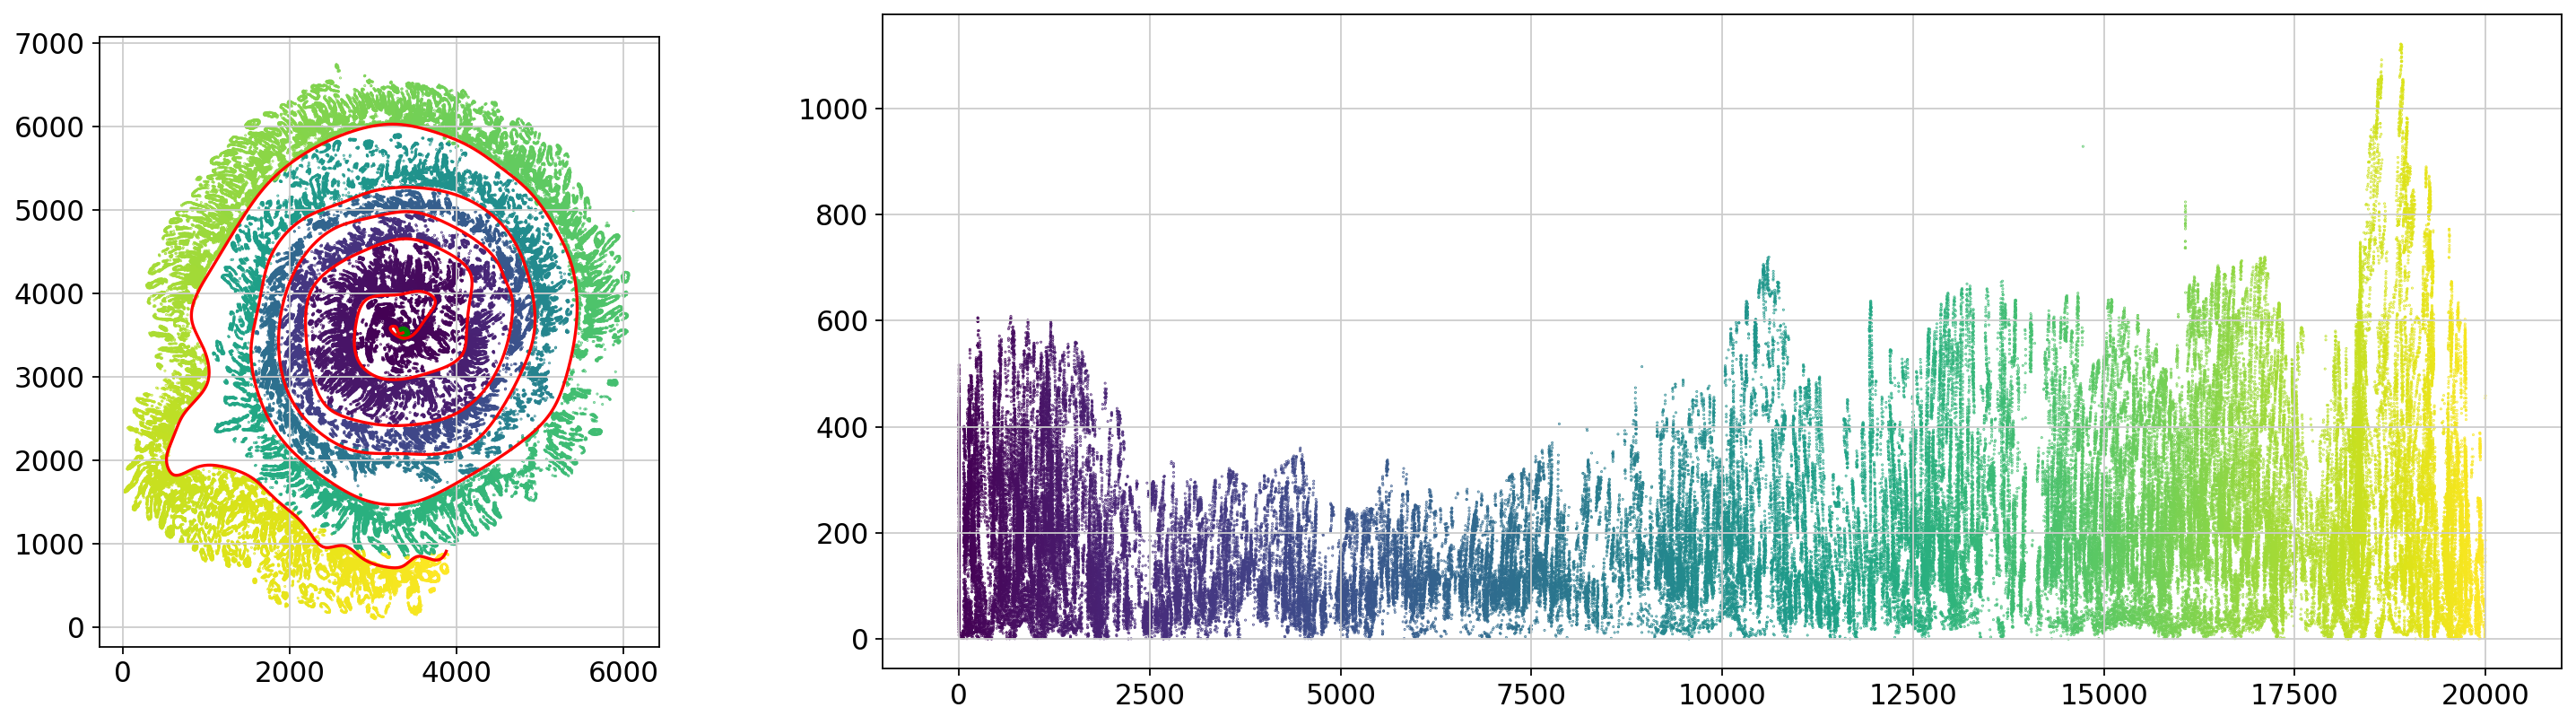

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6), gridspec_kw={'width_ratios': [1, 3]})

ax1.scatter(
    adata.obsm['spatial'][:,0],
    adata.obsm['spatial'][:,1],
    c = new_coords[:,0],
    s=.1
)
ax1.plot(*spline.T, color='red')
ax1.scatter(spline[0][0], spline[0][1], color='green')
ax1.set_aspect(1)

ax2.scatter(
    new_coords[:,0],
    new_coords[:,1],
    c = new_coords[:,0],
    s=.1
)

plt.show()


Let's add the unrolled coordinated as a to obms.

In [17]:
adata.obsm['unrolled'] = new_coords

Now, we can use the integrated plotting functions in scanpy to use all representations. Of course we have not normalized the data yet, and we also dont have a UMAP.representations

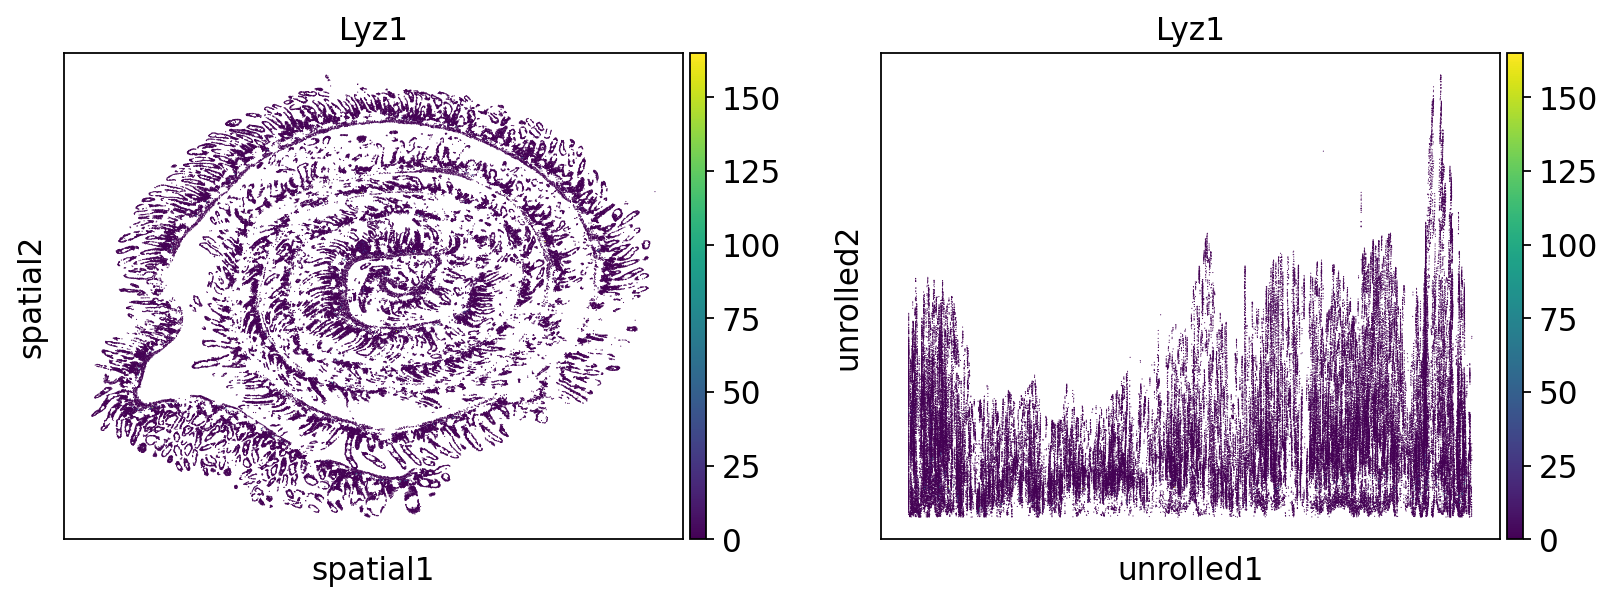

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1 = sc.pl.embedding(adata, basis='spatial', ax=ax1, color='Lyz1', show=False)
ax2 = sc.pl.embedding(adata, basis='unrolled', ax=ax2, color='Lyz1', show=False)

In [32]:
# Yay, let's save the results
adata.write(filename=path+"anndata_with_unrolled.h5ad")

In [33]:
# No need to run this anymore. This is part of an old analysis

In [12]:
# Make plots for P14 cells only
idx = np.where(adata.obs['cell type'] == 'P14 T cell')[0]

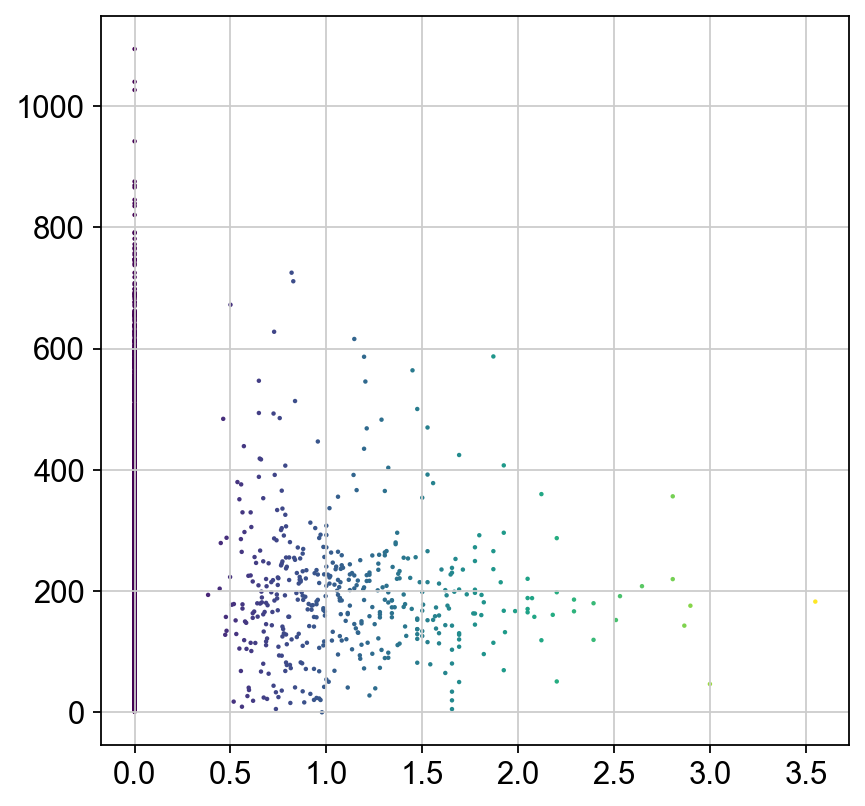

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(
    adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Tcf7')[0]],
    new_coords[idx,1],
    c = adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Tcf7')[0]],
    s=1
)

plt.show()

In [14]:
import seaborn as sns

/home/max/mambaforge/envs/scanpy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/max/mambaforge/envs/scanpy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


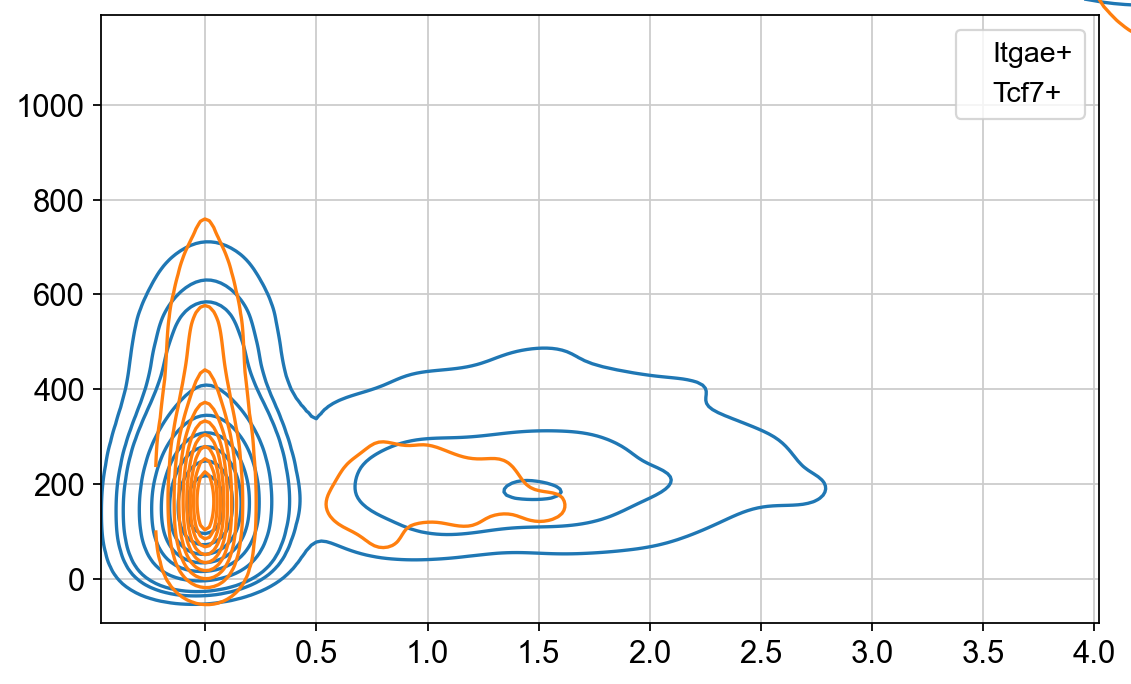

In [15]:
sns.kdeplot(
    adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Itgae')[0]],
    new_coords[idx,1],
    label="Itgae+")
sns.kdeplot(
    adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Tcf7')[0]],
    new_coords[idx,1],
    label="Tcf7+")
plt.legend()

In [50]:
dist_all_cells = new_coords[:,1]

dist_all_p14 = new_coords[idx,1]

dist_cd103 = new_coords[idx,1]
dist_cd103 = dist_cd103[adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Itgae')[0]] > 0]
dist_cd103.shape

dist_tcf7 = new_coords[idx,1]
dist_tcf7 = dist_tcf7[adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Tcf7')[0]] > 0]
dist_tcf7.shape

dist_il18rap = new_coords[idx,1]
dist_il18rap = dist_il18rap[adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Il18rap')[0]] > 0]

dist_il18r1 = new_coords[idx,1]
dist_il18r1 = dist_il18r1[adata.layers['sqrt_norm'][idx, np.where(adata.var_names == 'Il18r1')[0]] > 0]

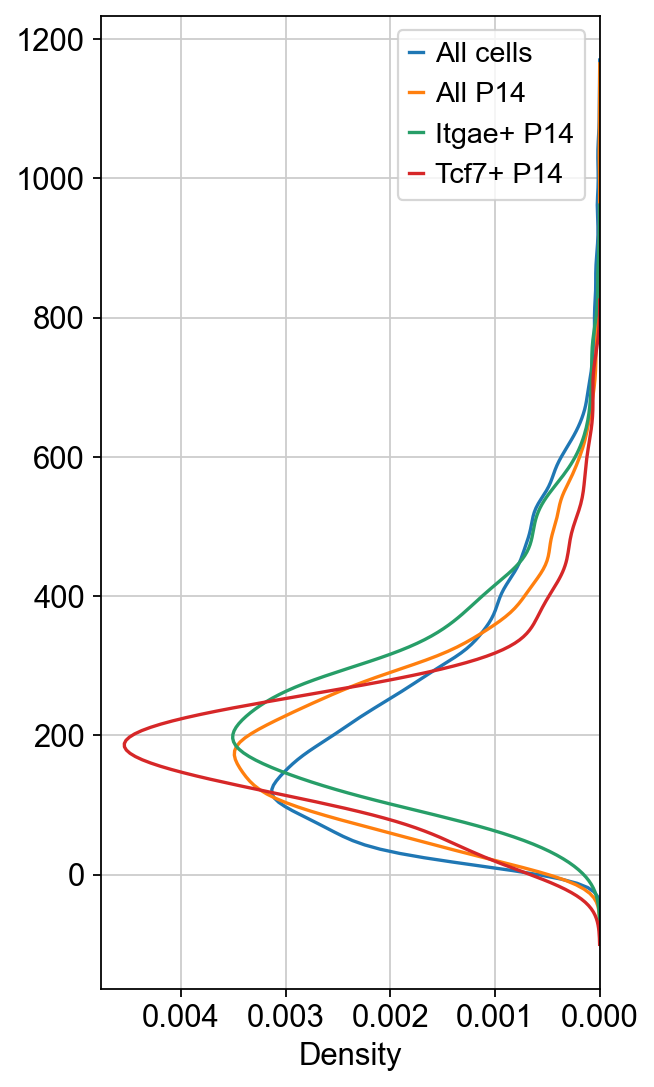

In [45]:
plt.figure(figsize = (4,8))
sns.kdeplot(y=dist_all_cells, label="All cells")
sns.kdeplot(y=dist_all_p14, label="All P14")
sns.kdeplot(y=dist_cd103, label="Itgae+ P14")
ax = sns.kdeplot(y=dist_tcf7, label="Tcf7+ P14")
ax.invert_xaxis()
plt.legend()

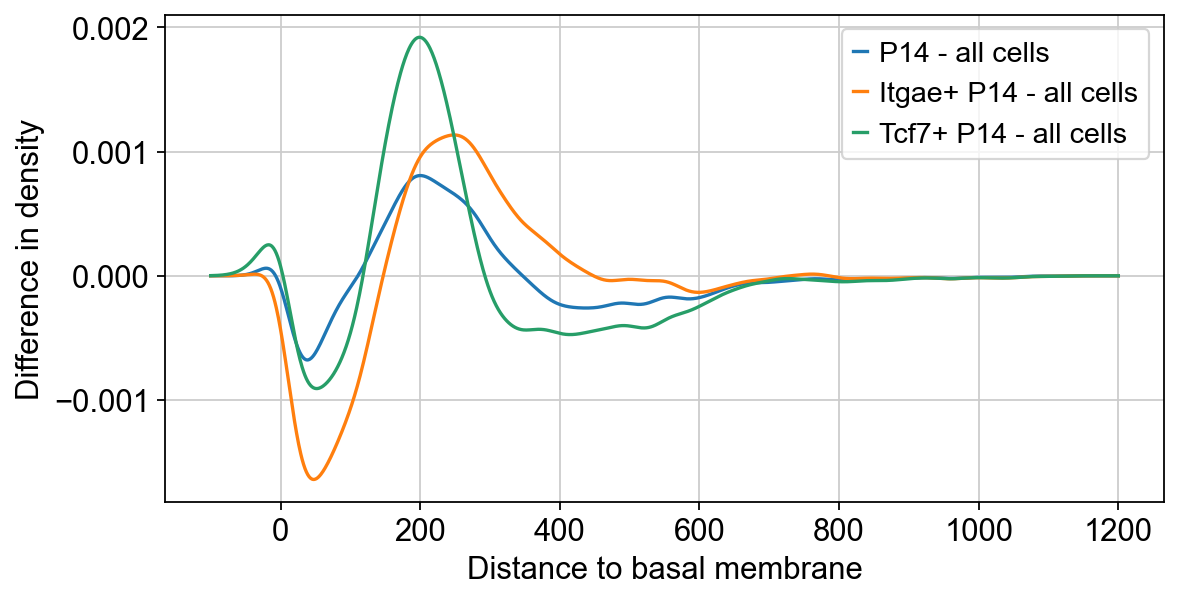

In [51]:
import scipy.stats

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)


kde_all_cells = scipy.stats.gaussian_kde(dist_all_cells)
kde_all_p14 = scipy.stats.gaussian_kde(dist_all_p14)
kde_all_p14_cd103 = scipy.stats.gaussian_kde(dist_cd103)
kde_all_p14_tcf7 = scipy.stats.gaussian_kde(dist_tcf7)
kde_all_p14_il18rap = scipy.stats.gaussian_kde(dist_il18rap)
kde_all_p14_il18r1 = scipy.stats.gaussian_kde(dist_il18r1)

grid = np.linspace(-100,1200, 1301)

ax.plot(grid, kde_all_p14(grid)-kde_all_cells(grid), label="P14 - all cells")
ax.plot(grid, kde_all_p14_cd103(grid)-kde_all_cells(grid), label="Itgae+ P14 - all cells")
ax.plot(grid, kde_all_p14_tcf7(grid)-kde_all_cells(grid), label="Tcf7+ P14 - all cells")

ax.set_ylabel("Difference in density")
ax.set_xlabel("Distance to basal membrane")

plt.legend()
plt.show()

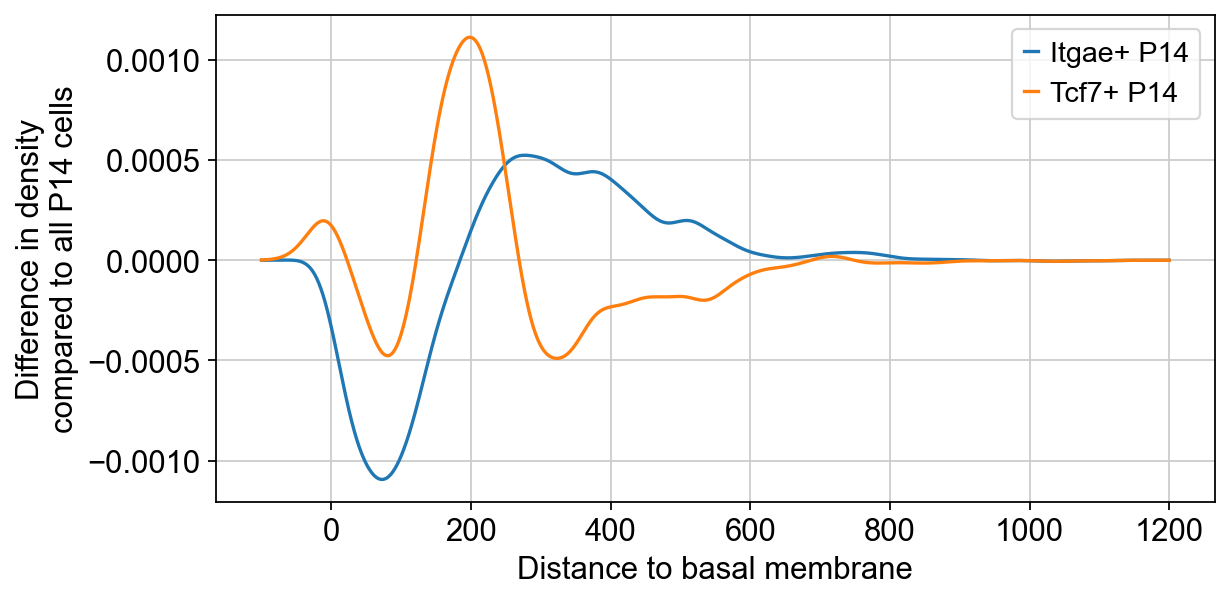

In [52]:
import scipy.stats

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)


grid = np.linspace(-100,1200, 1301)

ax.plot(grid, kde_all_p14_cd103(grid)-kde_all_p14(grid), label="Itgae+ P14")
ax.plot(grid, kde_all_p14_tcf7(grid)-kde_all_p14(grid), label="Tcf7+ P14")

ax.set_ylabel("Difference in density\ncompared to all P14 cells")
ax.set_xlabel("Distance to basal membrane")

plt.legend()
plt.show()

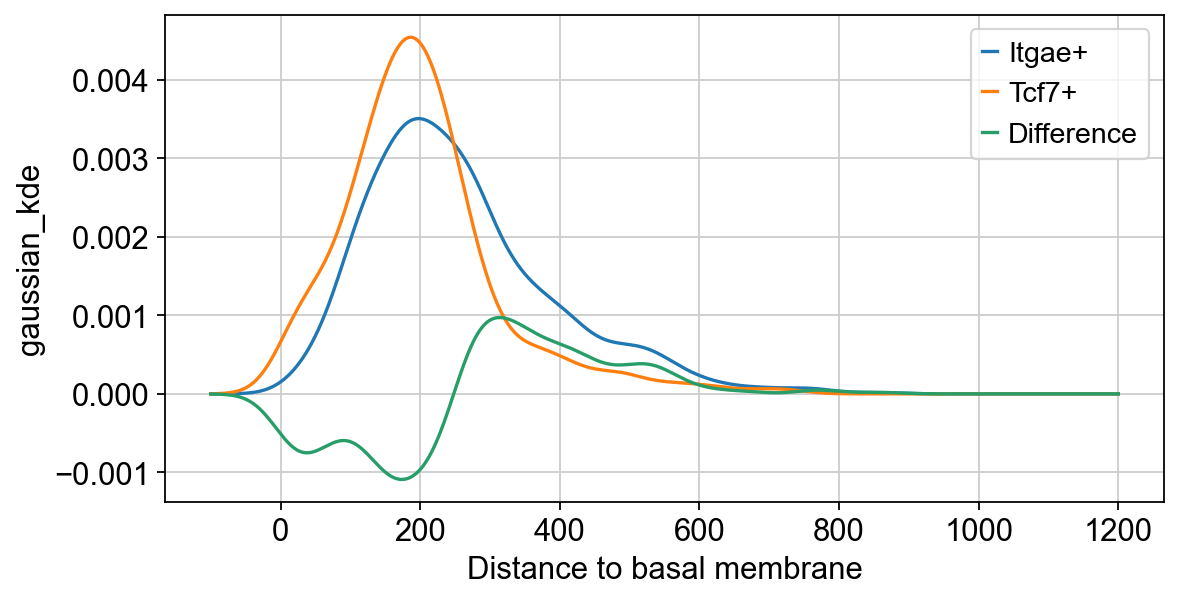

In [48]:
import scipy.stats

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)


grid = np.linspace(-100,1200, 1301)

ax.plot(grid, kde_all_p14_cd103(grid), label="Itgae+")
ax.plot(grid, kde_all_p14_tcf7(grid), label="Tcf7+")
ax.plot(grid, kde_all_p14_cd103(grid)-kde_all_p14_tcf7(grid), label="Difference")

ax.set_ylabel("gaussian_kde")
ax.set_xlabel("Distance to basal membrane")

plt.legend()
plt.show()

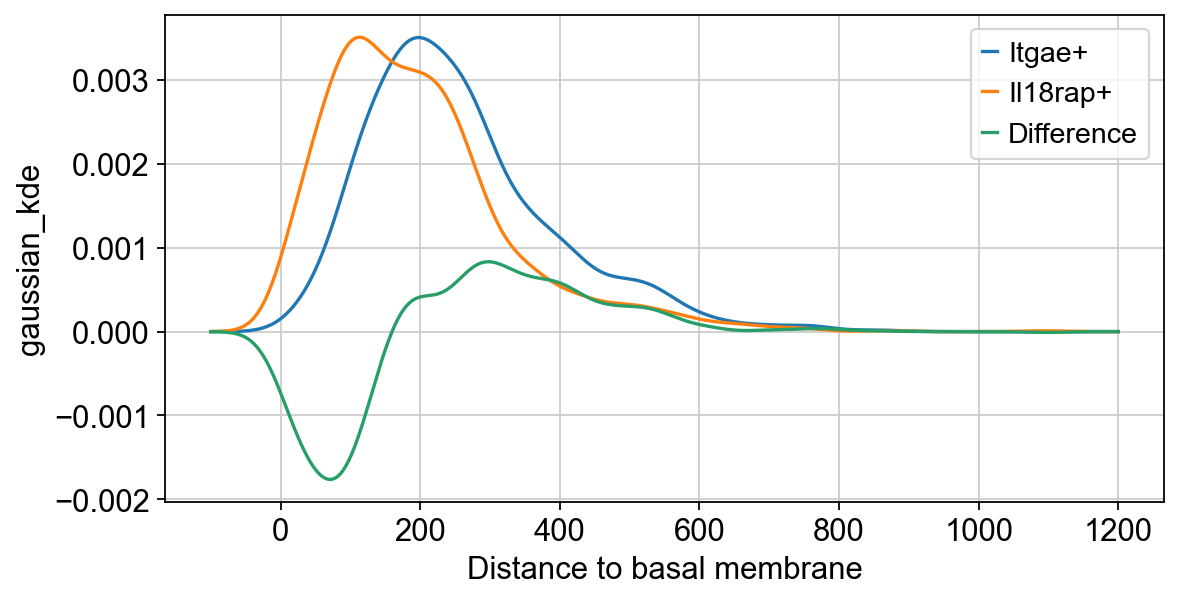

In [53]:
import scipy.stats

fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)


grid = np.linspace(-100,1200, 1301)

ax.plot(grid, kde_all_p14_cd103(grid), label="Itgae+")
ax.plot(grid, kde_all_p14_il18rap(grid), label="Il18rap+")
ax.plot(grid, kde_all_p14_cd103(grid)-kde_all_p14_il18rap(grid), label="Difference")

ax.set_ylabel("gaussian_kde")
ax.set_xlabel("Distance to basal membrane")

plt.legend()
plt.show()

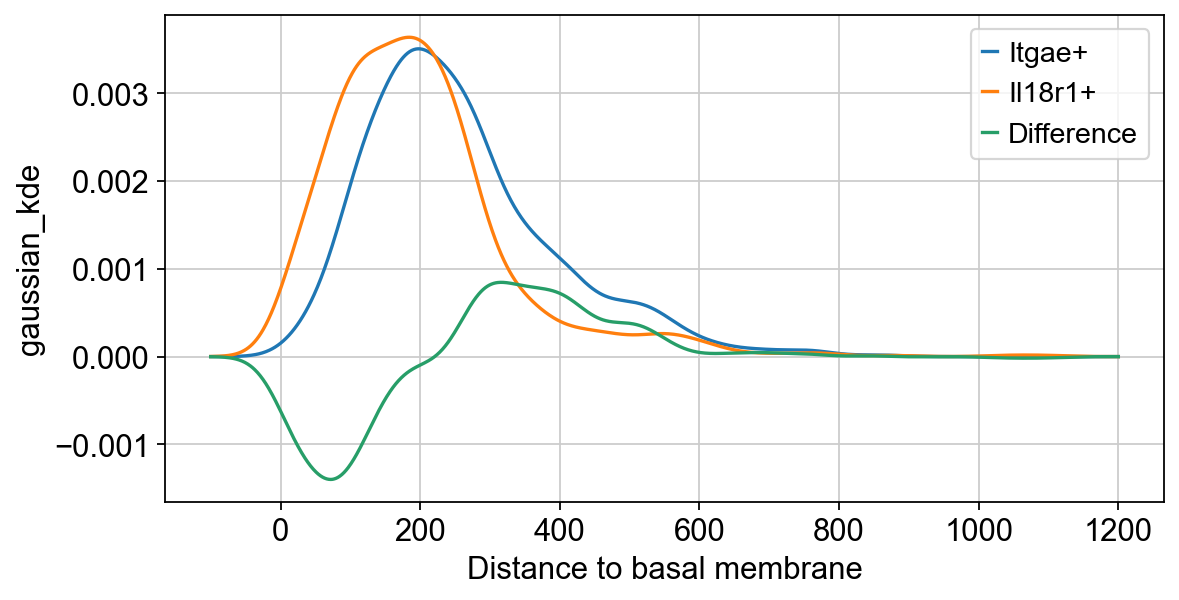

In [54]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(111)


grid = np.linspace(-100,1200, 1301)

ax.plot(grid, kde_all_p14_cd103(grid), label="Itgae+")
ax.plot(grid, kde_all_p14_il18r1(grid), label="Il18r1+")
ax.plot(grid, kde_all_p14_cd103(grid)-kde_all_p14_il18r1(grid), label="Difference")

ax.set_ylabel("gaussian_kde")
ax.set_xlabel("Distance to basal membrane")

plt.legend()
plt.show()

In [37]:
# test all genes for expression along the y axis

In [38]:
rho, p = scipy.stats.spearmanr(new_coords[idx,1], adata.layers['sqrt_norm'][idx])
# the return value is a matrix, we subset the first row and remove the first value
rho = rho[0, 1:]
p = p[0, 1:]
# lets find the ones that are significant
sig_genes = np.where(p <= 0.05)[0]

In [39]:
correlating_genes = pd.DataFrame({
    'gene': adata.var_names[sig_genes],
    'rho': rho[sig_genes],
    'p': p[sig_genes]
})

In [41]:
correlating_genes.to_csv('gene_correlation_to_distance_to_membrane.csv')